# Maximum Likelihood

Alípio Jorge

March 2021

# Learning as parameter estimation

## Learning can be seen as finding a function that fits the labeled data.

- The function can be found by **fitting** a model (e.g. a linear model)
- Often this means finding **the best parameters** of the model
    - parametric
- Or even finding an adequate **topology** for the model (e.g. decision trees)
    - nonparametric (no fixed structure of the model) or hybrid

# Learning as parameter estimation

## Model fitting can be done by minimizing a **loss measure**.

- sum of squares for regression
- cross-entropy for classification

## These can be seen as instances of the **maximum likelihood** approach:

- Find the parameters that make the observations most likely


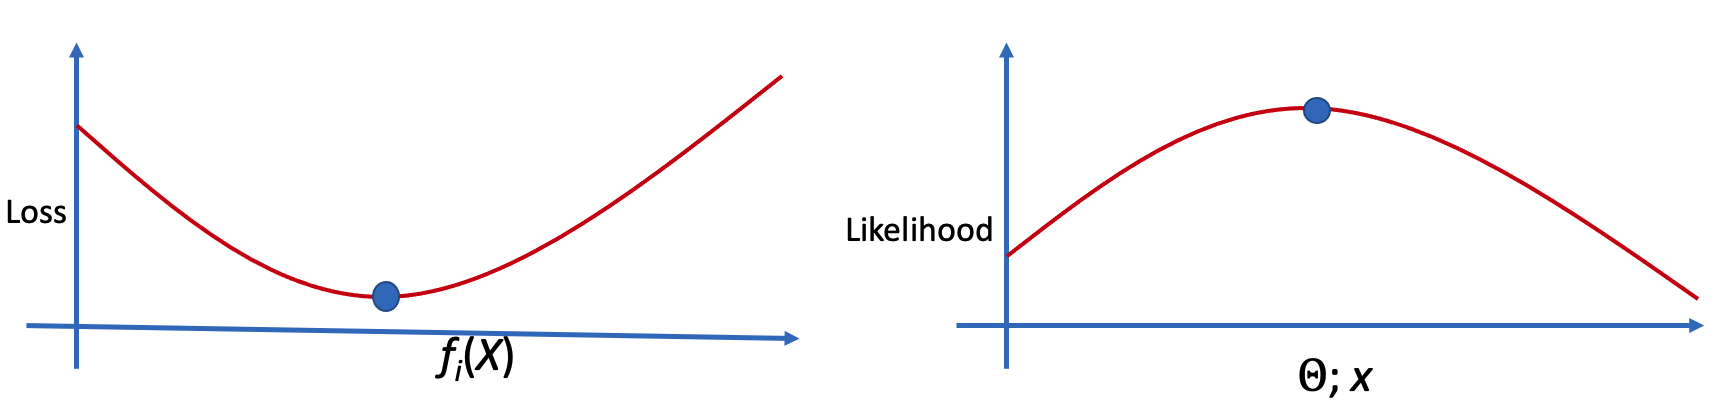

In [1]:
from IPython.display import Image
Image("imagens/min-loss-max-likelihood-mockup.png")

# Maximum Likelihood inference


- We have data $X$ (observations)
- We want to find a function $f$ that **explains** the data (learning)
- We **decide** that the function has a certain form (e.g. linear or quadratic)
  - A **family of functions**  $~f_\theta(x)$ with parameters $\theta$ 
- We want $f_{\theta}$ that maximizes $\Pr(Y|X;\theta)$
- The **maximum likelihood principle** says that the best $\theta$ maximizes the **likelihood function**
  
$$
Likelihood(\theta;X) = \Pr(Y|X;\theta)
$$

- We want to **infer** $\theta$ from the observations $X$
    - We reason in terms of $\theta$ and 
    - Maximize $Likelihood$ with respect to $\theta$

# Maximum Likelihood inference

- For each situation we may have a different likelihood function

## Example (this is not machine learning)

- We observe 20 values ( $x=$ the time a student takes to finish a task)
- We **assume** they have a normal distribution
  - two parameters: $\mu$ and $\sigma$
- We want the **most likely values** of these parameters
- The **probability of observing $x$ given the parameters** is given by the density function $P(x;\mu,\sigma)$ of $N(\mu,\sigma^2)$
- The **best parameters** maximize the likelihood function
  - The best $\theta$ under ML is the **maximum likelihood estimate**


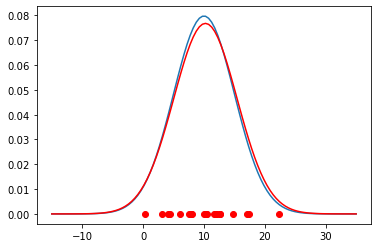

In [2]:
from numpy.random import normal
from numpy import linspace
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

mean=10; std=5
time = normal(mean,std,20)
x = linspace(mean-5*std,mean+5*std,100)
y = norm.pdf(x,mean,std)

plt.plot(x,y)
plt.scatter(time,[0]*len(time),color='red')
samplemean=np.mean(time)
samplestd=np.std(time)
plt.plot(x,norm.pdf(x,samplemean,samplestd),color='red');

# Maximum Likelihood inference in general

- Likelihood is a **function of $\theta$**
- The observations are independent
- $P$ is a pdf (probability density function)

$$
Likelihood(\theta;X) = Lh(\theta;X) = \prod_{i=1}^{20} P(x_i;\theta)
$$

## Maximizing Likelihood

- It is equivalent to maximizing the *log-likelihood* $\ell$
    - And more convenient

$$
\ell(\theta;X)=log(Lh(\theta;X)) = \sum_{i=1}^{20} log~P(x_i;\theta)
$$



# Maximum Likelihood inference and Least Squares

- **Minimizing the squared error** is a special case of maximizing the log likelihood 
  - The $\beta_i$ found by linear regression are the Maximum Likelihood estimates
  - This can be demonstrated


- **How** to go from Maximum Likelihood to Least Squares?
    - Assuming that the **residuals follow a normal distribution**
    - Applying the **log** to the product of the probabilities of each value
    - **Deriving** with respect to $\theta$ and equaling to zero


# Maximum Likelihood inference and Least Squares

- **How** to go from Maximum Likelihood to Least Squares?

- Assuming the residuals have normal distribution and considering one predictor

$$
y_i~|~X=x_i ∼ Normal(\mu=(\beta_0+\beta_1 x_i), \sigma_2)
$$



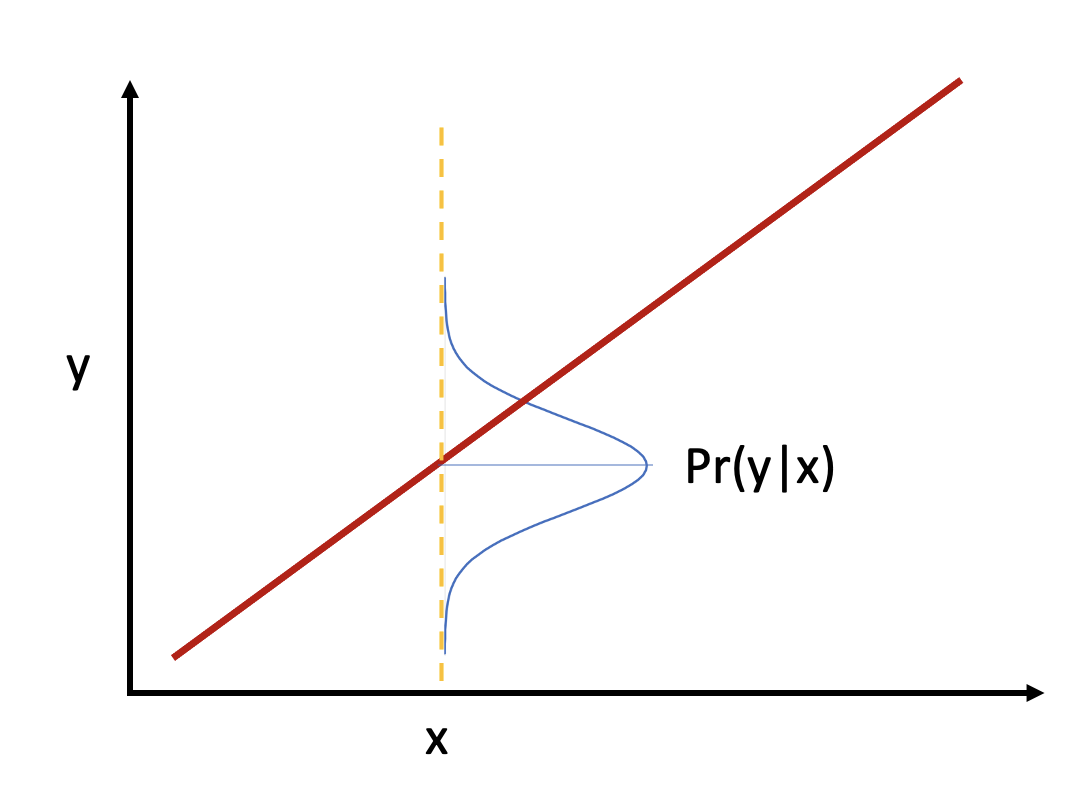

In [4]:
Image("imagens/regression-gaussian-residuals.png")

# Maximum Likelihood inference and Least Squares

- The *pdf* for $y_i|X=x_i$ (i.e., for a fixed input) is

$$
\frac{e^{-\frac{1}{2} \sigma^2 (y-(\beta_0+\beta_1 x_i))^2 )}}{\sqrt{2 \pi \sigma^2}} 
$$

- Going to **log likelihood** makes it easier to maximize

$$
-\frac{1}{2} \sigma^2 (y-(\beta_0+\beta_1 x_i))^2 )-\log(\sqrt{2 \pi \sigma^2}) 
$$

- Multiply by $-1$ and identify what depends on the parameters and we can **minimize**

$$
(y-(\beta_0+\beta_1 x_i))^2
$$

# Maximum Likelihood inference

## In summary

- Learning corresponds to finding a function $\hat{f}(x)$ given data $X$
- We **can** hypothesize that this function has a general form $f_\theta(x)$
    - parametric approach
- So, learning can be translated to **estimating** parameters $\theta$ from $X$
- **Maximum Likelihood** estimation is one way of finding the parameters
- Under certain assumptions, **Maximum Likelihood** leads to **Least Squares**
- The best $\theta$ are the ones that maximize the **likelihood function**
    - For linear regression (and other simple families of functions) we can do this analytically
    - But not in general (e.g. neural networks)

# Lessons learned

- **Minimizing loss function** leads to maximizing $P(y|X)$
    - if the loss function is well designed
        - e.g., Least squares
- We can try to **maximize $P(y|X)$ directly** without starting with a loss function
    - e.g., Naive Bayes or kNN
- When the model is **parametric**:
    - We can find the best parameters by minimizing the loss function
    - The MLE finds the best parameters by maximizing likelihood
    - In some cases both are equivalent
- MLE and loss minimization are **important** for:
    - Understanding why machine learning methods work
    - Finding new machine learning methods (from first principles)

# Bibliography

- The Elements of Statistical Learning. Hastie, Trevor, Tibshirani, Robert, Friedman, Jerome, Springer. (chapter 2 and chapter 8)
- A Gentle Introduction to Linear Regression With Maximum Likelihood Estimation, Jason Brownlee, Machine Learning Mastery
- Machine Learning, Tom Mitchel (
- An Introduction to Statistical Learning, James, Witten, Hastie, Tibshirani. Springer. (section 2.1.2)